#### IMPORTAÇÃO DAS BIBLIOTECAS QUE VAMOS USAR

In [1]:
import pandas as pd

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


#### IMPORTAÇÃO DOS DADOS

In [2]:
combustiveis_maio = pd.read_csv("https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2023/precos-gasolina-etanol-05.csv", sep=(";"))
combustiveis_junho = pd.read_csv("https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2023/precos-gasolina-etanol-06.csv", sep=(";"))
#data3 = pd.read_csv("drive/MyDrive/ultimas-4-semanas-gasolina-etanol.csv", sep=(";"), error_bad_lines=False)
tabelas = pd.concat([combustiveis_maio, combustiveis_junho,], ignore_index=True)


In [3]:
tabelas.shape

(107531, 16)

# <font color ='red' size=6>3. Tratamento do Dados</font>

##### <font color ='white' size=5>3.1. Vamos verificar a porcentagem de dados ausentes em cada coluna.</font>

In [4]:

(((tabelas.isnull().sum() / tabelas.shape[0]) * 100).sort_values(ascending=False)).round(4)

Valor de Compra      100.0000
Complemento           77.8222
Bairro                 0.2102
Numero Rua             0.0418
Regiao - Sigla         0.0000
Estado - Sigla         0.0000
Municipio              0.0000
Revenda                0.0000
CNPJ da Revenda        0.0000
Nome da Rua            0.0000
Cep                    0.0000
Produto                0.0000
Data da Coleta         0.0000
Valor de Venda         0.0000
Unidade de Medida      0.0000
Bandeira               0.0000
dtype: float64

Podemos verificara que as colunas "Valor de Compra " e "Complmento" altas porcentagens de registros nulos

##### <font color ='white' size=5>3.2. Tratamento dos dados</font>

- Resetando o Index no DataFrame concatenado:

In [6]:
tabelas.reset_index(0,drop=True,inplace = True)

- Retirar a coluna valor de compra, pois tem 100% dos valores nulos,preencher a coluna complemento com 0 e mudar o tipo da coluna valor de venda de object para float64

In [7]:
tabelas.drop('Valor de Compra',axis=1,inplace=True)

- Transformando valores da Coluna 'Valor de Venda' para float64

In [8]:
tabelas['Valor de Venda'] = tabelas['Valor de Venda'].str.replace(',', '.').astype(float)

- Removendo a coluna "Complemento"

In [9]:
tabelas.drop('Complemento', axis=1, inplace=True)

- Alterando o tipo de dado da coluna 'Data da Coleta' para datetime

In [ ]:
tabelas['Data da Coleta'] = pd.to_datetime(tabelas['Data da Coleta'], dayfirst=True)

##### Após fazermos a limpeza dos dados vamos conferir como está  nosso dataframe

In [18]:
tabelas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107531 entries, 0 to 107530
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Regiao - Sigla     107531 non-null  object        
 1   Estado - Sigla     107531 non-null  object        
 2   Municipio          107531 non-null  object        
 3   Revenda            107531 non-null  object        
 4   CNPJ da Revenda    107531 non-null  object        
 5   Nome da Rua        107531 non-null  object        
 6   Numero Rua         107486 non-null  object        
 7   Bairro             107305 non-null  object        
 8   Cep                107531 non-null  object        
 9   Produto            107531 non-null  object        
 10  Data da Coleta     107531 non-null  datetime64[ns]
 11  Valor de Venda     107531 non-null  float64       
 12  Unidade de Medida  107531 non-null  object        
 13  Bandeira           107531 non-null  object  

# <font color ='red' size=6>4 Checando outliers.</font>

  #### 4.1 Resumo estatístico dos valores com o método describe

In [19]:
tabelas['Valor de Venda'].describe().round(3)

count    107531.000
mean          5.030
std           0.764
min           2.970
25%           4.490
50%           5.240
75%           5.590
max           7.990
Name: Valor de Venda, dtype: float64

#### 4.2 Separando o dataframe principal em dataframes por mês

In [20]:
tabelas['Data da Coleta'] = pd.to_datetime(tabelas['Data da Coleta'], format='%d/%m/%Y')


# Filtrar as datas para o mês de maio
maio = tabelas[tabelas['Data da Coleta'].dt.month == 5]
# Filtrar as datas para o mês de junho
junho = tabelas[tabelas['Data da Coleta'].dt.month == 6]


#### 4.3 Criando dataframes específicos para cada combustível

In [26]:
etanol = tabelas[(tabelas['Produto'] == 'ETANOL') ]
gasolina = tabelas[(tabelas['Produto'] == 'GASOLINA') ]
gasolina_adtivada = tabelas[(tabelas['Produto'] == 'GASOLINA ADITIVADA') ]
etanol.sort_values(by='Valor de Venda').tail(132)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
10285,NE,BA,EUNAPOLIS,GEO MERCANTIL DE DERIVADOS DE PETROLEO LTDA,02.114.331/0001-88,RODOVIA BR 101,S/N,URBIS I,45829-110,ETANOL,2023-05-04,5.59,R$ / litro,IPIRANGA
94018,N,PA,PARAUAPEBAS,POSTO PARAUAPEBAS LTDA,05.098.033/0001-30,RUA E,SN,CENTRO,68515-000,ETANOL,2023-06-22,5.59,R$ / litro,VIBRA ENERGIA
11702,N,PA,PARAUAPEBAS,POSTO PARAUAPEBAS LTDA,05.098.033/0001-30,RUA E,SN,CENTRO,68515-000,ETANOL,2023-05-05,5.59,R$ / litro,VIBRA ENERGIA
11693,N,PA,PARAUAPEBAS,POSTO DA PAZ COMERCIO VAREJISTA DE COMBUSTIVEI...,06.966.087/0001-32,RUA SOL POENTE,87,DA PAZ,68515-000,ETANOL,2023-05-05,5.59,R$ / litro,VIBRA ENERGIA
8195,CO,GO,GOIATUBA,AUTO POSTO SCAPIM LTDA. - ME,10.482.745/0001-98,RUA MINAS GERAIS,549,CENTRO,75600-000,ETANOL,2023-05-03,5.60,R$ / litro,BRANCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6776,S,RS,BAGE,L. CASTRO COMERCIO DE COMBUSTIVEIS LTDA,05.799.373/0002-79,RUA EMÍLIO GUILAIN,673,CENTRO,96415-100,ETANOL,2023-05-03,6.29,R$ / litro,IPIRANGA
19622,S,RS,PASSO FUNDO,ALBACORA COMBUSTIVEIS LTDA - ME,04.845.316/0001-35,RUA INDEPENDENCIA,20,CENTRO,99010-041,ETANOL,2023-05-10,6.49,R$ / litro,RODOIL
2118,NE,AL,DELMIRO GOUVEIA,POSTO ALINE LTDA,17.348.259/0002-01,AVENIDA ANTONIO JOSE DA COSTA,59,CENTRO,57480-000,ETANOL,2023-05-01,6.50,R$ / litro,RAIZEN
18247,NE,AL,DELMIRO GOUVEIA,POSTO ALINE LTDA,17.348.259/0002-01,AVENIDA ANTONIO JOSE DA COSTA,59,CENTRO,57480-000,ETANOL,2023-05-09,6.50,R$ / litro,RAIZEN


In [14]:
etanol['Valor de Venda'].describe().round(3)

count    34935.00
mean         4.10
std          0.47
min          2.97
25%          3.74
50%          3.99
75%          4.45
max          6.73
Name: Valor de Venda, dtype: float64

In [15]:
etanol['Valor de Venda'].quantile(.99)

5.29


#### 4.4 Calculo do limites de outlier

##### 4.4.1 Definindo um range para os outliers utilizando a Regra 1.5 IQR (Interquartile Range): Valores que estão abaixo de Q1 - 1.5 * IQR ou acima de Q3 + 1.5 * IQR, onde Q1 é o primeiro quartil e Q3 é o terceiro quartil.


In [37]:
# Definindo os quartis para o etanol
primeiro_quartil_etanol = etanol['Valor de Venda'].describe().loc['25%']
terceiro_quartil_etanol = etanol['Valor de Venda'].describe().loc['75%']


# Definindo os quartis para a gasolina
primeiro_quartil_gasolina = gasolina['Valor de Venda'].describe().loc['25%']
terceiro_quartil_gasolina = gasolina['Valor de Venda'].describe().loc['75%']

# Definindo os quartis para o gasolina aditivada
primeiro_quartil_aditivada = gasolina_adtivada['Valor de Venda'].describe().loc['25%']
terceiro_quartil_aditivada = gasolina_adtivada['Valor de Venda'].describe().loc['75%']

dados = {
    'Combustível': ['Etanol', 'Gasolina', 'Gasolina Aditivada'],
    'Primeiro Quartil': [primeiro_quartil_etanol, primeiro_quartil_gasolina, primeiro_quartil_aditivada],
    'Terceiro Quartil': [terceiro_quartil_etanol, terceiro_quartil_gasolina, terceiro_quartil_aditivada]
}

# Criar o DataFrame
df_quartis = pd.DataFrame(dados)

df_quartis


,Combustível,Primeiro Quartil,Terceiro Quartil
0,Etanol,3.74,4.45
1,Gasolina,5.17,5.59
2,Gasolina Aditivada,5.32,5.79


##### 4.4.2 Definimos os limites inferiores e superioes de outliers

In [35]:
#Calculando o IQR e os limites para detecção de outliers

# IQR = Q3 - Q1

#Etanol
IQR_etanol = terceiro_quartil_etanol - primeiro_quartil_etanol


limite_outlier_inferior_etanol = (primeiro_quartil_etanol - (1.5 * IQR_etanol)).round(3)
limite_outlier_superior_etanol = (terceiro_quartil_etanol + (1.5 * IQR_etanol)).round(3)

#Gasolina
IQR_gasolina = terceiro_quartil_gasolina - primeiro_quartil_gasolina

limite_outlier_inferior_gasolina = (primeiro_quartil_gasolina - (1.5 * IQR_gasolina)).round(3)
limite_outlier_superior_gasolina = (terceiro_quartil_gasolina + (1.5 * IQR_gasolina)).round(3)

#Gasolina Aditivada
IQR_gasolina_aditivada = terceiro_quartil_aditivada - primeiro_quartil_aditivada

limite_outlier_inferior_aditivada = (primeiro_quartil_aditivada - (1.5 * IQR_gasolina_aditivada)).round(3)
limite_outlier_superior_aditivada = (terceiro_quartil_aditivada + (1.5 * IQR_gasolina_aditivada)).round(3)



dados = {
    'Combustível': ['Etanol', 'Gasolina', 'Gasolina Aditivada'],
    'IQR': [IQR_etanol, IQR_gasolina, IQR_gasolina_aditivada],
    'Limite Inferior': [limite_outlier_inferior_etanol, limite_outlier_inferior_gasolina, limite_outlier_inferior_aditivada],
    'Limite Superior': [limite_outlier_superior_etanol, limite_outlier_superior_gasolina, limite_outlier_superior_aditivada]
}

df_intervalos_outlier = pd.DataFrame(dados)

df_intervalos_outlier

,Combustível,IQR,Limite Inferior,Limite Superior
0,Etanol,0.71,2.675,5.515
1,Gasolina,0.42,4.540,6.220
2,Gasolina Aditivada,0.47,4.615,6.495


- Verificação da existencia de outlier acima dos limites definidos

In [40]:
# Etanol
outliers_abaixo_etanol = etanol['Valor de Venda'] < limite_outlier_inferior_etanol
quantidade_outliers_abaixo_etanol = outliers_abaixo_etanol.sum()


# Gasolina
outliers_abaixo_gasolina = gasolina['Valor de Venda'] < limite_outlier_inferior_gasolina
quantidade_outliers_abaixo_gasolina = outliers_abaixo_gasolina.sum()


# Gasolina Aditivada
outliers_abaixo_aditivada = gasolina_adtivada['Valor de Venda'] < limite_outlier_inferior_aditivada
quantidade_outliers_abaixo_aditivada = outliers_abaixo_aditivada.sum()

dados = {
    'Combustível': ['Etanol', 'Gasolina', 'Gasolina Aditivada'],
    'Outliers Abaixo': [quantidade_outliers_abaixo_etanol, quantidade_outliers_abaixo_gasolina, quantidade_outliers_abaixo_aditivada]
}

# Criar o DataFrame
df_quantidade_outliers = pd.DataFrame(dados)

df_quantidade_outliers

,Combustível,Outliers Abaixo
0,Etanol,0
1,Gasolina,48
2,Gasolina Aditivada,10


In [54]:
# Calcular a quantidade de outliers acima para o etanol
outliers_acima_etanol = etanol['Valor de Venda'] > limite_outlier_superior_etanol
quantidade_outliers_acima_etanol = outliers_acima_etanol.sum()

# Calcular a quantidade de outliers acima para a gasolina
outliers_acima_gasolina = gasolina['Valor de Venda'] > limite_outlier_superior_gasolina
quantidade_outliers_acima_gasolina = outliers_acima_gasolina.sum()

# Calcular a quantidade de outliers acima para a gasolina aditivada
outliers_acima_aditivada = gasolina_adtivada['Valor de Venda'] > limite_outlier_superior_aditivada
quantidade_outliers_acima_aditivada = outliers_acima_aditivada.sum()

# Dados
dados = {
    'Combustível': ['Etanol', 'Gasolina', 'Gasolina Aditivada'],
    'Quantidade de Outliers Acima': [quantidade_outliers_acima_etanol, quantidade_outliers_acima_gasolina, quantidade_outliers_acima_aditivada]
}

# Criar o DataFrame
df_quantidade_outliers_acima = pd.DataFrame(dados)

df_quantidade_outliers_acima

,Combustível,Quantidade de Outliers Acima
0,Etanol,146
1,Gasolina,841
2,Gasolina Aditivada,514


In [60]:
porcentagem_acima_etanol = (quantidade_outliers_acima_etanol / len(etanol)) * 100
porcentagem_abaixo_etanol = (quantidade_outliers_abaixo_etanol / len(etanol)) * 100

porcentagem_acima_gasolina = (quantidade_outliers_acima_gasolina / len(gasolina)) * 100
porcentagem_abaixo_gasolina = (quantidade_outliers_abaixo_gasolina / len(gasolina)) * 100

porcentagem_acima_aditivada = (quantidade_outliers_acima_aditivada / len(gasolina_adtivada)) * 100
porcentagem_abaixo_aditivada = (quantidade_outliers_abaixo_aditivada / len(gasolina_adtivada)) * 100

# Dados
dados = {
    'Combustível': ['Etanol', 'Gasolina', 'Gasolina Aditivada'],
    'Porcentagem de Outliers Acima (%)': [porcentagem_acima_etanol, porcentagem_acima_gasolina, porcentagem_acima_aditivada],
    'Porcentagem de Outliers Abaixo (%)': [porcentagem_abaixo_etanol, porcentagem_abaixo_gasolina, porcentagem_abaixo_aditivada]
}

# Criar o DataFrame
df_porcentagem_outliers = pd.DataFrame(dados)

df_porcentagem_outliers.round(2)

,Combustível,Porcentagem de Outliers Acima (%),Porcentagem de Outliers Abaixo (%)
0,Etanol,0.42,0.00
1,Gasolina,2.05,0.12
2,Gasolina Aditivada,1.62,0.03


In [41]:
outliers_acima_etanol = etanol['Valor de Venda']>limite_outlier_superior_etanol
quantidade_outliers_acima_etanol=outliers_acima_etanol.sum()
quantidade_outliers_acima_etanol

146

##### <font color ='gold' >4.3 Após os calculos de outliers indetificamos que não temos outliers abaixo do limite inferior, mas temos 146 outliers acima do limite superior,Vamos usar um boxplot para visualizar os outliers.</font>

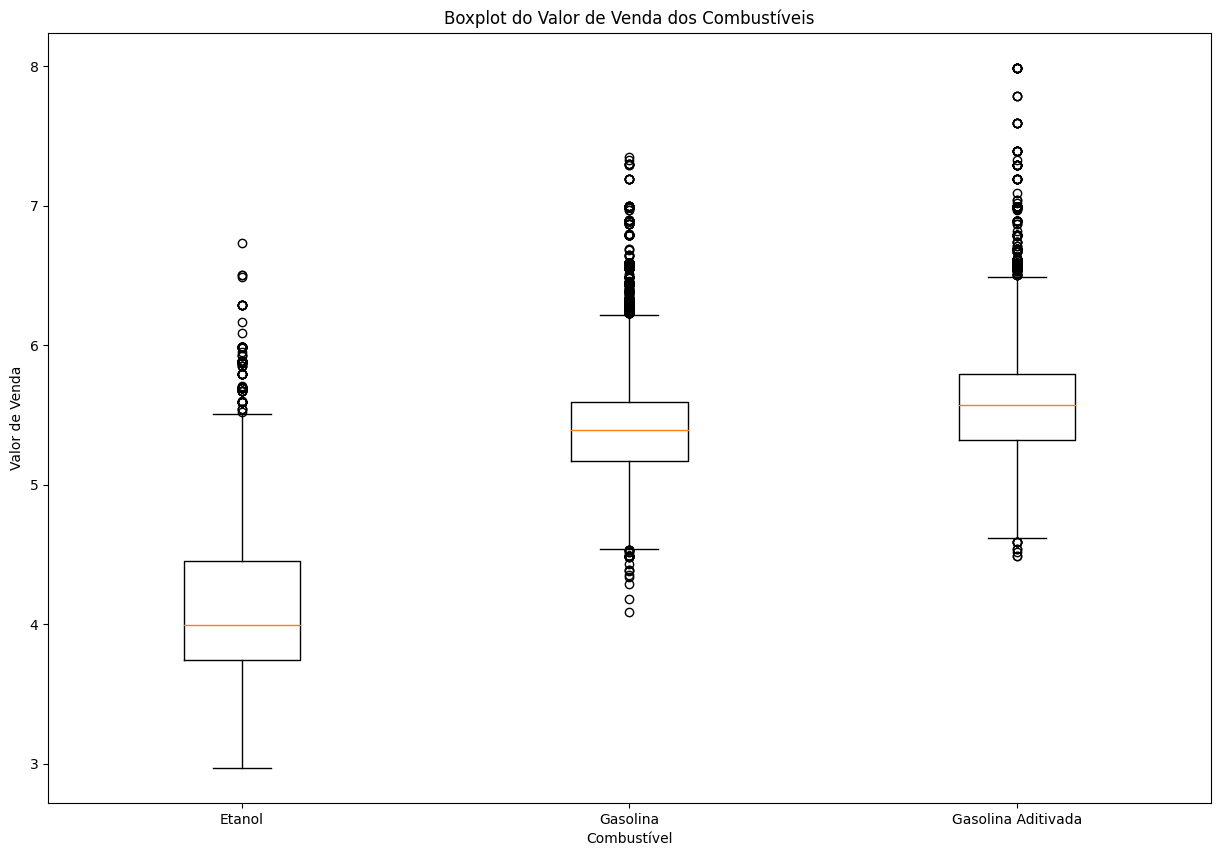

In [66]:
import matplotlib.pyplot as plt

# Dados
dados = [etanol['Valor de Venda'], gasolina['Valor de Venda'], gasolina_adtivada['Valor de Venda']]
nomes_combustiveis = ['Etanol', 'Gasolina', 'Gasolina Aditivada']

# Tamanho da figura
plt.figure(figsize=(15, 10))

# Criação do boxplot com outliers
plt.boxplot(dados, vert=True, labels=nomes_combustiveis, showfliers=True)  # vert=False para um boxplot horizontal

# Título e rótulos
plt.title('Boxplot do Valor de Venda dos Combustíveis')
plt.xlabel('Combustível')
plt.ylabel('Valor de Venda')

# Mostrar o gráfico
plt.show()

In [67]:
etanol['Valor de Venda'].quantile(.99)

5.29

In [26]:
data = etanol[etanol['Valor de Venda'] > terceiro_quartil].shape[0]
data


8656

- Consultando quantos % os outliers representam na quantidade total de

In [38]:
data

8656

In [34]:
total_rows = etanol.shape[0]
percentage = (data / total_rows) * 100

print(f"A porcentagem é: {percentage:.2f}%")


A porcentagem é: 24.78%


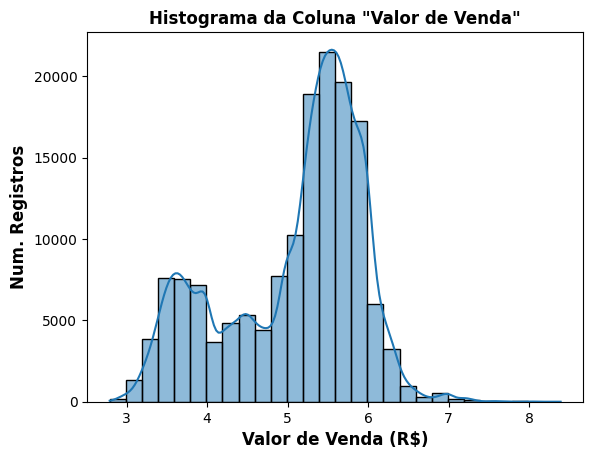

In [20]:
sns.histplot(data=tabelas['Valor de Venda'], kde=True, binwidth=0.2)

plt.title('Histograma da Coluna "Valor de Venda"', fontsize=12, fontweight='bold')
plt.ylabel('Num. Registros', fontsize=12, fontweight='bold')
plt.xlabel('Valor de Venda (R$)', fontsize=12, fontweight='bold')
plt.show()

Etanol no mês de junho

In [ ]:
tabelas['Data da Coleta'] = pd.to_datetime(tabelas['Data da Coleta'], dayfirst=True)

# Filter rows for 'ETANOL' and the month of June
etanol_june = tabelas[(tabelas['Produto'] == 'ETANOL') & (tabelas['Data da Coleta'].dt.month == 6)]

etanol_june.sort_values(by='Data da Coleta')

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,BA,IRECE,IRECE DERIVADOS DE PETROLEO LTDA,09.186.976/0001-75,PRACA AIRTON SENNA,285,TERREO,CENTRO,44900-000,ETANOL,2023-06-01,"4,31",NaN,R$ / litro,VIBRA ENERGIA
863,SE,SP,MIRASSOL,AUTO POSTO MIRAMAX LTDA,10.943.250/0001-19,RUA OSVALDO CRUZ,21-56,NaN,CENTRO,15130-000,ETANOL,2023-06-01,"3,79",NaN,R$ / litro,BRANCA
861,CO,GO,GOIATUBA,AUTO POSTO SCAPIM LTDA. - ME,10.482.745/0001-98,RUA MINAS GERAIS,549,NaN,CENTRO,75600-000,ETANOL,2023-06-01,"3,88",NaN,R$ / litro,BRANCA
858,SE,SP,ITAPOLIS,COOPERCITRUS COOPERATIVA DE PRODUTORES RURAIS,45.236.791/0088-42,AVENIDA CARLOS ADOLFSON,2070,NaN,CENTRO,14900-000,ETANOL,2023-06-01,"3,59",NaN,R$ / litro,IPIRANGA
855,SE,SP,PINDAMONHANGABA,SETE ESTRELAS COMERCIO DE DERIVADOS DE PETROLE...,00.256.893/0030-75,AVENIDA DOUTOR FRANCISCO LESSA JUNIOR,1205,NaN,CHACARA GALEGA,12422-010,ETANOL,2023-06-01,"3,57",NaN,R$ / litro,BRANCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48976,CO,GO,GOIANIA,AUTO POSTO CASTELO LTDA,01.675.138/0001-53,AVENIDA CASTELO BRANCO,3739,NaN,ST RODOVIARIO,74430-130,ETANOL,2023-06-30,"3,94",NaN,R$ / litro,BRANCA
48978,CO,GO,GOIANIA,POSTO DEZ LTDA,01.135.706/0001-23,AVENIDA C12,779,QUADRA124 LOTE 02/03/04,SETOR SUDOESTE,74305-010,ETANOL,2023-06-30,"3,97",NaN,R$ / litro,RAIZEN
48981,SE,MG,OURO PRETO,AUTO POSTO S.F.CENTRO LTDA,04.625.030/0001-44,RUA PADRE ROLIM,284,NaN,CENTRO,35400-000,ETANOL,2023-06-30,"3,69",NaN,R$ / litro,BRANCA
48985,SE,MG,OURO PRETO,AUTO POSTO OURO PRETO LTDA,01.819.646/0001-68,RUA PADRE ROLIM,3000,NaN,SAO CRISTOVAO,35400-000,ETANOL,2023-06-30,"3,69",NaN,R$ / litro,RAIZEN


In [ ]:
soma_por_cnpj = etanol_june.groupby('CNPJ da Revenda').size()
soma_por_cnpj

CNPJ da Revenda
 00.001.974/0001-90    3
 00.002.953/0001-99    3
 00.002.953/0002-70    4
 00.003.188/0001-21    4
 00.003.188/0004-74    2
                      ..
 96.826.375/0001-84    2
 96.841.580/0001-19    1
 97.430.284/0001-98    1
 97.521.669/0001-60    3
 97.526.192/0001-06    1
Length: 5598, dtype: int64

# SOMATORIO DAS VENDAS DE ETANOL EM JUNHO

In [ ]:
etanol_june.info()

In [ ]:
media_etanol_junho = etanol_june['Valor de Venda'].str.replace(',', '.').astype(float).mean()

round(media_etanol_junho,2)

4.01

# ETANOL NO MES DE JULHO

In [ ]:
tabelas['Data da Coleta'] = pd.to_datetime(tabelas['Data da Coleta'], dayfirst=True)

# Filter rows for 'ETANOL' and the month of Julho
etanol_julho = tabelas[(tabelas['Produto'] == 'ETANOL') & (tabelas['Data da Coleta'].dt.month == 7)]

etanol_julho.sort_values(by='Data da Coleta')

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
49042,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,ETANOL,2023-07-03,"3,27",NaN,R$ / litro,BRANCA
51494,NE,MA,IMPERATRIZ,POSTO DE COMBUSTIVEIS ADVENTURE LTDA,09.474.517/0001-97,RUA RIO GRANDE DO NORTE,436,CASA: ESQUINA C/AVE.INDUST;,SANTA RITA,65919-140,ETANOL,2023-07-03,"4,79",NaN,R$ / litro,VIBRA ENERGIA
51485,NE,CE,LIMOEIRO DO NORTE,COMERCIAL DE PETROLEO SAO MATHEUS LTDA.,07.356.644/0001-66,AVENIDA DOM AURELIANO MATOS,1472,NaN,CENTRO,62930-000,ETANOL,2023-07-03,"4,89",NaN,R$ / litro,BRANCA
51482,NE,PB,BAYEUX,PARELHAS GAS LTDA,24.206.617/0021-70,RODOVIA BR 101 - KM 03,S/N,NaN,MANGUINHOS,58309-600,ETANOL,2023-07-03,"4,37",NaN,R$ / litro,VIBRA ENERGIA
51479,SE,MG,BELO HORIZONTE,ECO EMPREENDIMENTOS COMERCIAIS LTDA,00.194.032/0002-56,RUA CONCEICAO DO MATO DENTRO,335,NaN,OURO PRETO,31310-240,ETANOL,2023-07-03,"3,99",NaN,R$ / litro,VIBRA ENERGIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98499,SE,MG,JUIZ DE FORA,AUTO POSTO CONQUISTA LTDA,02.050.251/0001-06,RUA ABILIO GOMES,S/N,LTS. 01/02/03/04 QD. H,FRANCISCO BERNADINHO,36083-010,ETANOL,2023-07-31,"4,09",NaN,R$ / litro,VIBRA
98497,SE,MG,JUIZ DE FORA,AUTO POSTO VAS CAS LTDA,03.264.269/0001-73,AVENIDA BRASIL,2002,NaN,CENTRO,36062-420,ETANOL,2023-07-31,"4,06",NaN,R$ / litro,ALESAT
98494,SE,MG,JUIZ DE FORA,AUTO POSTO TERRA BRASILIS LTDA,04.919.589/0001-87,RUA JOSE LOURENCO,175,LOTE 20,SAO PEDRO,36037-460,ETANOL,2023-07-31,"3,98",NaN,R$ / litro,VIBRA
98569,SE,MG,POUSO ALEGRE,AGENOR POSTO DE COMBUSTIVEIS LTDA.,19.283.605/0001-65,AVENIDA PINTO COBRA,1480,NaN,JARDIM SAO JOSE,37554-027,ETANOL,2023-07-31,"3,57",NaN,R$ / litro,VIBRA


# MEDIA DE PREÇO DO MES DE JULHO - ETANOL

In [ ]:
media_etanol_julho = etanol_julho['Valor de Venda'].str.replace(',', '.').astype(float).mean()
round(media_etanol_julho,2)

4.06

 GASOLINAS NO MES DE JUNHO

In [ ]:
tabelas['Data da Coleta'] = pd.to_datetime(tabelas['Data da Coleta'], dayfirst=True)

# Filter rows for 'ETANOL' and the month of June
gasolina_june = tabelas[(tabelas['Produto'].isin(['GASOLINA', 'GASOLINA ADITIVADA'])) & (tabelas['Data da Coleta'].dt.month == 6)]


gasolina_june.sort_values(by='Data da Coleta')

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
1,NE,BA,IRECE,IRECE DERIVADOS DE PETROLEO LTDA,09.186.976/0001-75,PRACA AIRTON SENNA,285,TERREO,CENTRO,44900-000,GASOLINA,2023-06-01,"5,39",NaN,R$ / litro,VIBRA ENERGIA
830,SE,SP,DIADEMA,POSTO DE SERVICOS 1991 LTDA.,10.308.272/0001-07,AVENIDA ANTONIO PIRANGA,1991,NaN,CANHEMA,09942-000,GASOLINA,2023-06-01,"4,99",NaN,R$ / litro,IPIRANGA
832,SE,SP,DIADEMA,CENTRO AUTOMOTIVO CAHEMA LTDA,10.276.028/0001-00,AVENIDA DOM JOAO VI,296,NaN,TABOAO,09940-150,GASOLINA ADITIVADA,2023-06-01,"4,89",NaN,R$ / litro,BRANCA
833,SE,SP,DIADEMA,CENTRO AUTOMOTIVO CAHEMA LTDA,10.276.028/0001-00,AVENIDA DOM JOAO VI,296,NaN,TABOAO,09940-150,GASOLINA,2023-06-01,"4,79",NaN,R$ / litro,BRANCA
835,SE,SP,SALTO,AUTO POSTO CENTURYCAR LTDA.,10.417.359/0001-12,AVENIDA D. PEDRO II,1153,NaN,CENTRO,13320-241,GASOLINA,2023-06-01,"4,79",NaN,R$ / litro,BRANCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48986,SE,MG,OURO PRETO,AUTO POSTO OURO PRETO LTDA,01.819.646/0001-68,RUA PADRE ROLIM,3000,NaN,SAO CRISTOVAO,35400-000,GASOLINA,2023-06-30,"5,39",NaN,R$ / litro,RAIZEN
48988,SE,MG,OURO PRETO,AUTO POSTO FERRARI LTDA,01.018.631/0001-09,RUA JOAO BATISTA FORTES,34,NaN,PILAR,35400-000,GASOLINA,2023-06-30,"5,49",NaN,R$ / litro,BRANCA
48990,NE,BA,CAMACARI,POSTO CAMAÇARI LTDA.,13.015.680/0001-69,AVENIDA RADIAL A,173/178,NaN,CENTRO,42800-000,GASOLINA ADITIVADA,2023-06-30,"5,64",NaN,R$ / litro,BRANCA
48993,NE,BA,CAMACARI,TREVO DERIVADOS DE PETROLEO LTDA,14.486.153/0003-67,VIA PERIMETRAL,SN,NaN,POLO PETROQUIMICO,42810-400,GASOLINA,2023-06-30,"5,64",NaN,R$ / litro,VIBRA ENERGIA


MEDIA DE PREÇO GASOLINA MES DE JUNHO

In [ ]:
media_gasolina_junho  = gasolina_june['Valor de Venda'].str.replace(',', '.').astype(float).mean()
round(media_gasolina_junho ,2)

5.47

GASOLINAS NO MES DE JULHO

In [ ]:
tabelas['Data da Coleta'] = pd.to_datetime(tabelas['Data da Coleta'], dayfirst=True)

# Filter rows for 'ETANOL' and the month of June
gasolina_julho = tabelas[(tabelas['Produto'].isin(['GASOLINA', 'GASOLINA ADITIVADA'])) & (tabelas['Data da Coleta'].dt.month == 7)]


gasolina_julho.sort_values(by='Data da Coleta')

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
49041,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,GASOLINA,2023-07-03,"4,87",NaN,R$ / litro,BRANCA
51587,SE,SP,SAO PAULO,AUTO POSTO LIRITAPURA LTDA,07.441.746/0001-80,RUA MELO FREIRE,1232,NaN,TATUAPE,03314-030,GASOLINA,2023-07-03,"5,99",NaN,R$ / litro,IPIRANGA
51588,SE,SP,SAO PAULO,AUTO POSTO LIRITAPURA LTDA,07.441.746/0001-80,RUA MELO FREIRE,1232,NaN,TATUAPE,03314-030,GASOLINA ADITIVADA,2023-07-03,"6,49",NaN,R$ / litro,IPIRANGA
51591,SE,MG,JUIZ DE FORA,AUTO POSTO PAPAGAIO LTDA,10.782.507/0001-06,AV. PRESIDENTE JUSCELINO KUBITSCHEK,5553,A,NOVA ERA,36087-000,GASOLINA,2023-07-03,"5,79",NaN,R$ / litro,VIBRA ENERGIA
51592,S,PR,PINHAIS,AUTO POSTO UGANDA LTDA,08.800.828/0001-36,AVENIDA AYRTON SENNA DA SILVA,1158,NaN,PINEVILLE,83320-070,GASOLINA,2023-07-03,"5,89",NaN,R$ / litro,BRANCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98588,SE,MG,SAO JOAO DEL REI,COMERCIO E DISTRIBUICAO SALES LTDA,05.418.619/0013-78,AVENIDA LEITE DE CASTRO,261,A,FABRICAS,36301-182,GASOLINA,2023-07-31,"5,25",NaN,R$ / litro,BRANCA
98589,SE,MG,SAO JOAO DEL REI,COMERCIO E DISTRIBUICAO SALES LTDA,05.418.619/0013-78,AVENIDA LEITE DE CASTRO,261,A,FABRICAS,36301-182,GASOLINA ADITIVADA,2023-07-31,"5,25",NaN,R$ / litro,BRANCA
98591,SE,MG,SAO JOAO DEL REI,POSTO SHARK LTDA,03.128.389/0001-43,RUA JESUS SILVA,445,NaN,MATOSINHOS,36305-160,GASOLINA,2023-07-31,"5,2",NaN,R$ / litro,BRANCA
98813,NE,PE,CARUARU,J E PETROLEO LTDA,01.339.156/0005-98,RUA PROFESSOR AUGUSTO TABOSA,49,NaN,NOSSA SENHORA DAS DORES,55006-020,GASOLINA,2023-07-31,"5,39",NaN,R$ / litro,RAIZEN


MEDIA DE PREÇO GASOLINA MES DE JULHO

In [ ]:
media_gasolina_julho  = gasolina_julho['Valor de Venda'].str.replace(',', '.').astype(float).mean()
round(media_gasolina_julho ,3)

5.68

In [ ]:
import pandas as pd

# Criar dois DataFrames de exemplo
data1 = {'A': [1, 2, 3, 4, 5],
         'B': [5, 4, 3, 2, 1]}
df1 = pd.DataFrame(data1)

data2 = {'A': [5, 4, 3, 2, 1],
         'B': [1, 2, 3, 4, 5]}
df2 = pd.DataFrame(data2)

# Calcular a correlação entre os DataFrames
correlation_matrix = df1.corrwith(df2)

print("Matriz de correlação:")
print(correlation_matrix)


Matriz de correlação:
A   -1.0
B   -1.0
dtype: float64


In [ ]:
gasolina_julho['Valor de Venda'].count()


65505

In [ ]:
etanol_julho['Valor de Venda'].count()

31305

In [ ]:
ga = gasolina_julho['Valor de Venda'].sample(50)
ea = etanol_julho['Valor de Venda'].sample(50)

In [ ]:
ga = pd.DataFrame({'valor': ga.values})

# Resetar o índice do DataFrame "ga"
ga.reset_index(drop=True, inplace=True)


ValueError: ignored

In [ ]:
ea = pd.DataFrame({'valor': ea.values})

# Resetar o índice do DataFrame "ea"
ea.reset_index(drop=True, inplace=True)

In [ ]:
print(ea)

    valor
0    3.99
1    4.29
2    3.49
3    3.66
4    3.99
5    3.53
6    3.98
7    4.59
8    4.89
9    4.79
10   4.39
11   4.49
12   4.39
13   5.09
14   3.59
15   3.79
16   3.49
17   4.26
18   4.29
19   3.57
20   3.49
21   4.99
22   3.89
23   4.59
24   3.39
25   4.49
26   4.99
27   4.09
28   3.59
29   3.67
30   3.45
31   4.49
32   3.55
33   4.09
34   4.49
35   3.99
36   4.39
37   3.96
38   3.84
39   5.51
40   3.99
41   4.18
42   4.55
43   4.69
44   3.87
45   3.69
46   3.69
47   4.59
48   3.89
49   4.39


In [ ]:
correlation = ga['valor'].corr(ea['valor'])
correlation

-0.2275095945533276